In [1]:
%load_ext autoreload
%autoreload 2

### data loading and preparation

In [2]:
import concord as ccd
import scanpy as sc
import torch
import warnings
from pathlib import Path
warnings.filterwarnings('ignore')
import time
from pathlib import Path
device = torch.device('cuda:3' if torch.cuda.is_available() else 'cpu')
seed = 0

In [3]:
proj_name = "dkd_Wilson"
file_name = "dkd_Wilson"
file_suffix = time.strftime('%b%d-%H%M')
seed = 0

save_dir = Path(f"../save/{proj_name}")
save_dir.mkdir(parents=True, exist_ok=True)

data_dir = Path(f"../data/{proj_name}")
data_dir.mkdir(parents=True, exist_ok=True)


In [4]:
adata = sc.read_h5ad(data_dir / f"{file_name}_final.h5ad")

In [5]:
py_methods = ["scvi", "harmony", "scanorama", "unintegrated", "concord_hcl", "concord_knn", "contrastive"]


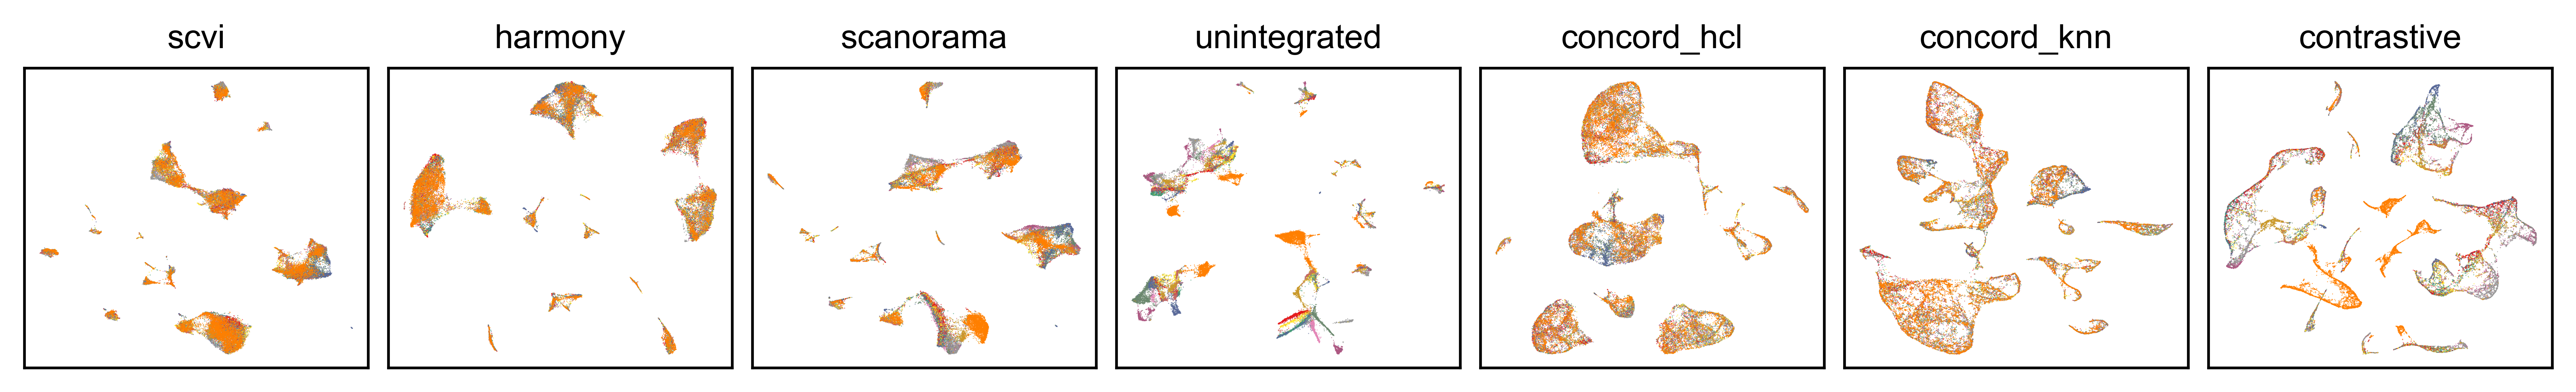

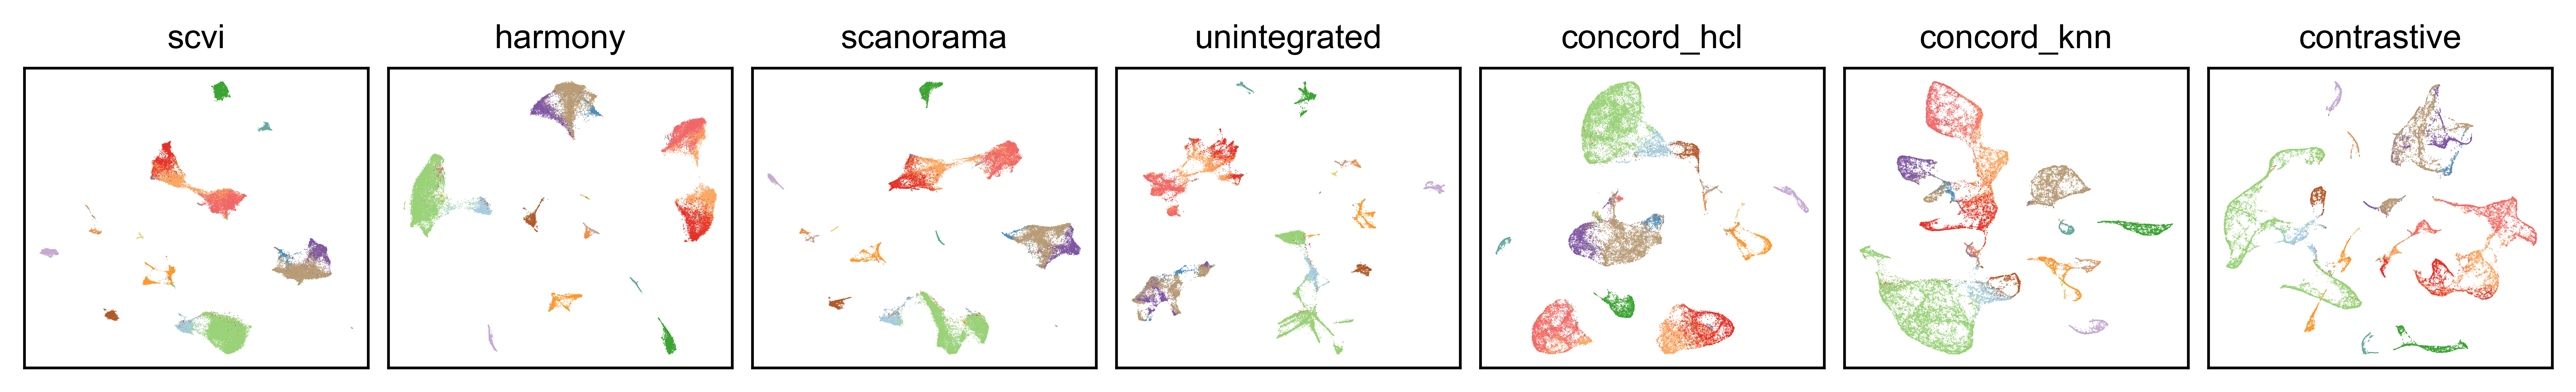

In [6]:
# plot everything
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# Set Arial as the default font
custom_rc = {
    'font.family': 'Arial',  # Set the desired font for this plot
}

show_keys = py_methods
show_cols = ['donor_id', 'author_cell_type']
basis_types = ['UMAP']

font_size=10
point_size=.3
alpha=0.8
ncols = len(show_keys)
figsize=(ncols * 1.5,1.5)
nrows = int(np.ceil(len(show_keys) / ncols))
pal = {'donor_id': 'Set1',
       "author_cell_type": 'Paired',}

with plt.rc_context(rc=custom_rc):
    ccd.pl.plot_all_embeddings(
        adata,
        show_keys,
        color_bys=show_cols,
        basis_types=basis_types,
        pal=pal,
        font_size=font_size,
        point_size=point_size,
        alpha=alpha,
        figsize=figsize,
        ncols=ncols,
        seed=seed,
        save_dir=save_dir,
        file_suffix=file_suffix,
        dpi=600,
        save_format='svg'
    )


Detected task: classification
Detected task: classification
[KNN] detected task: classification
[KNN] detected task: classification


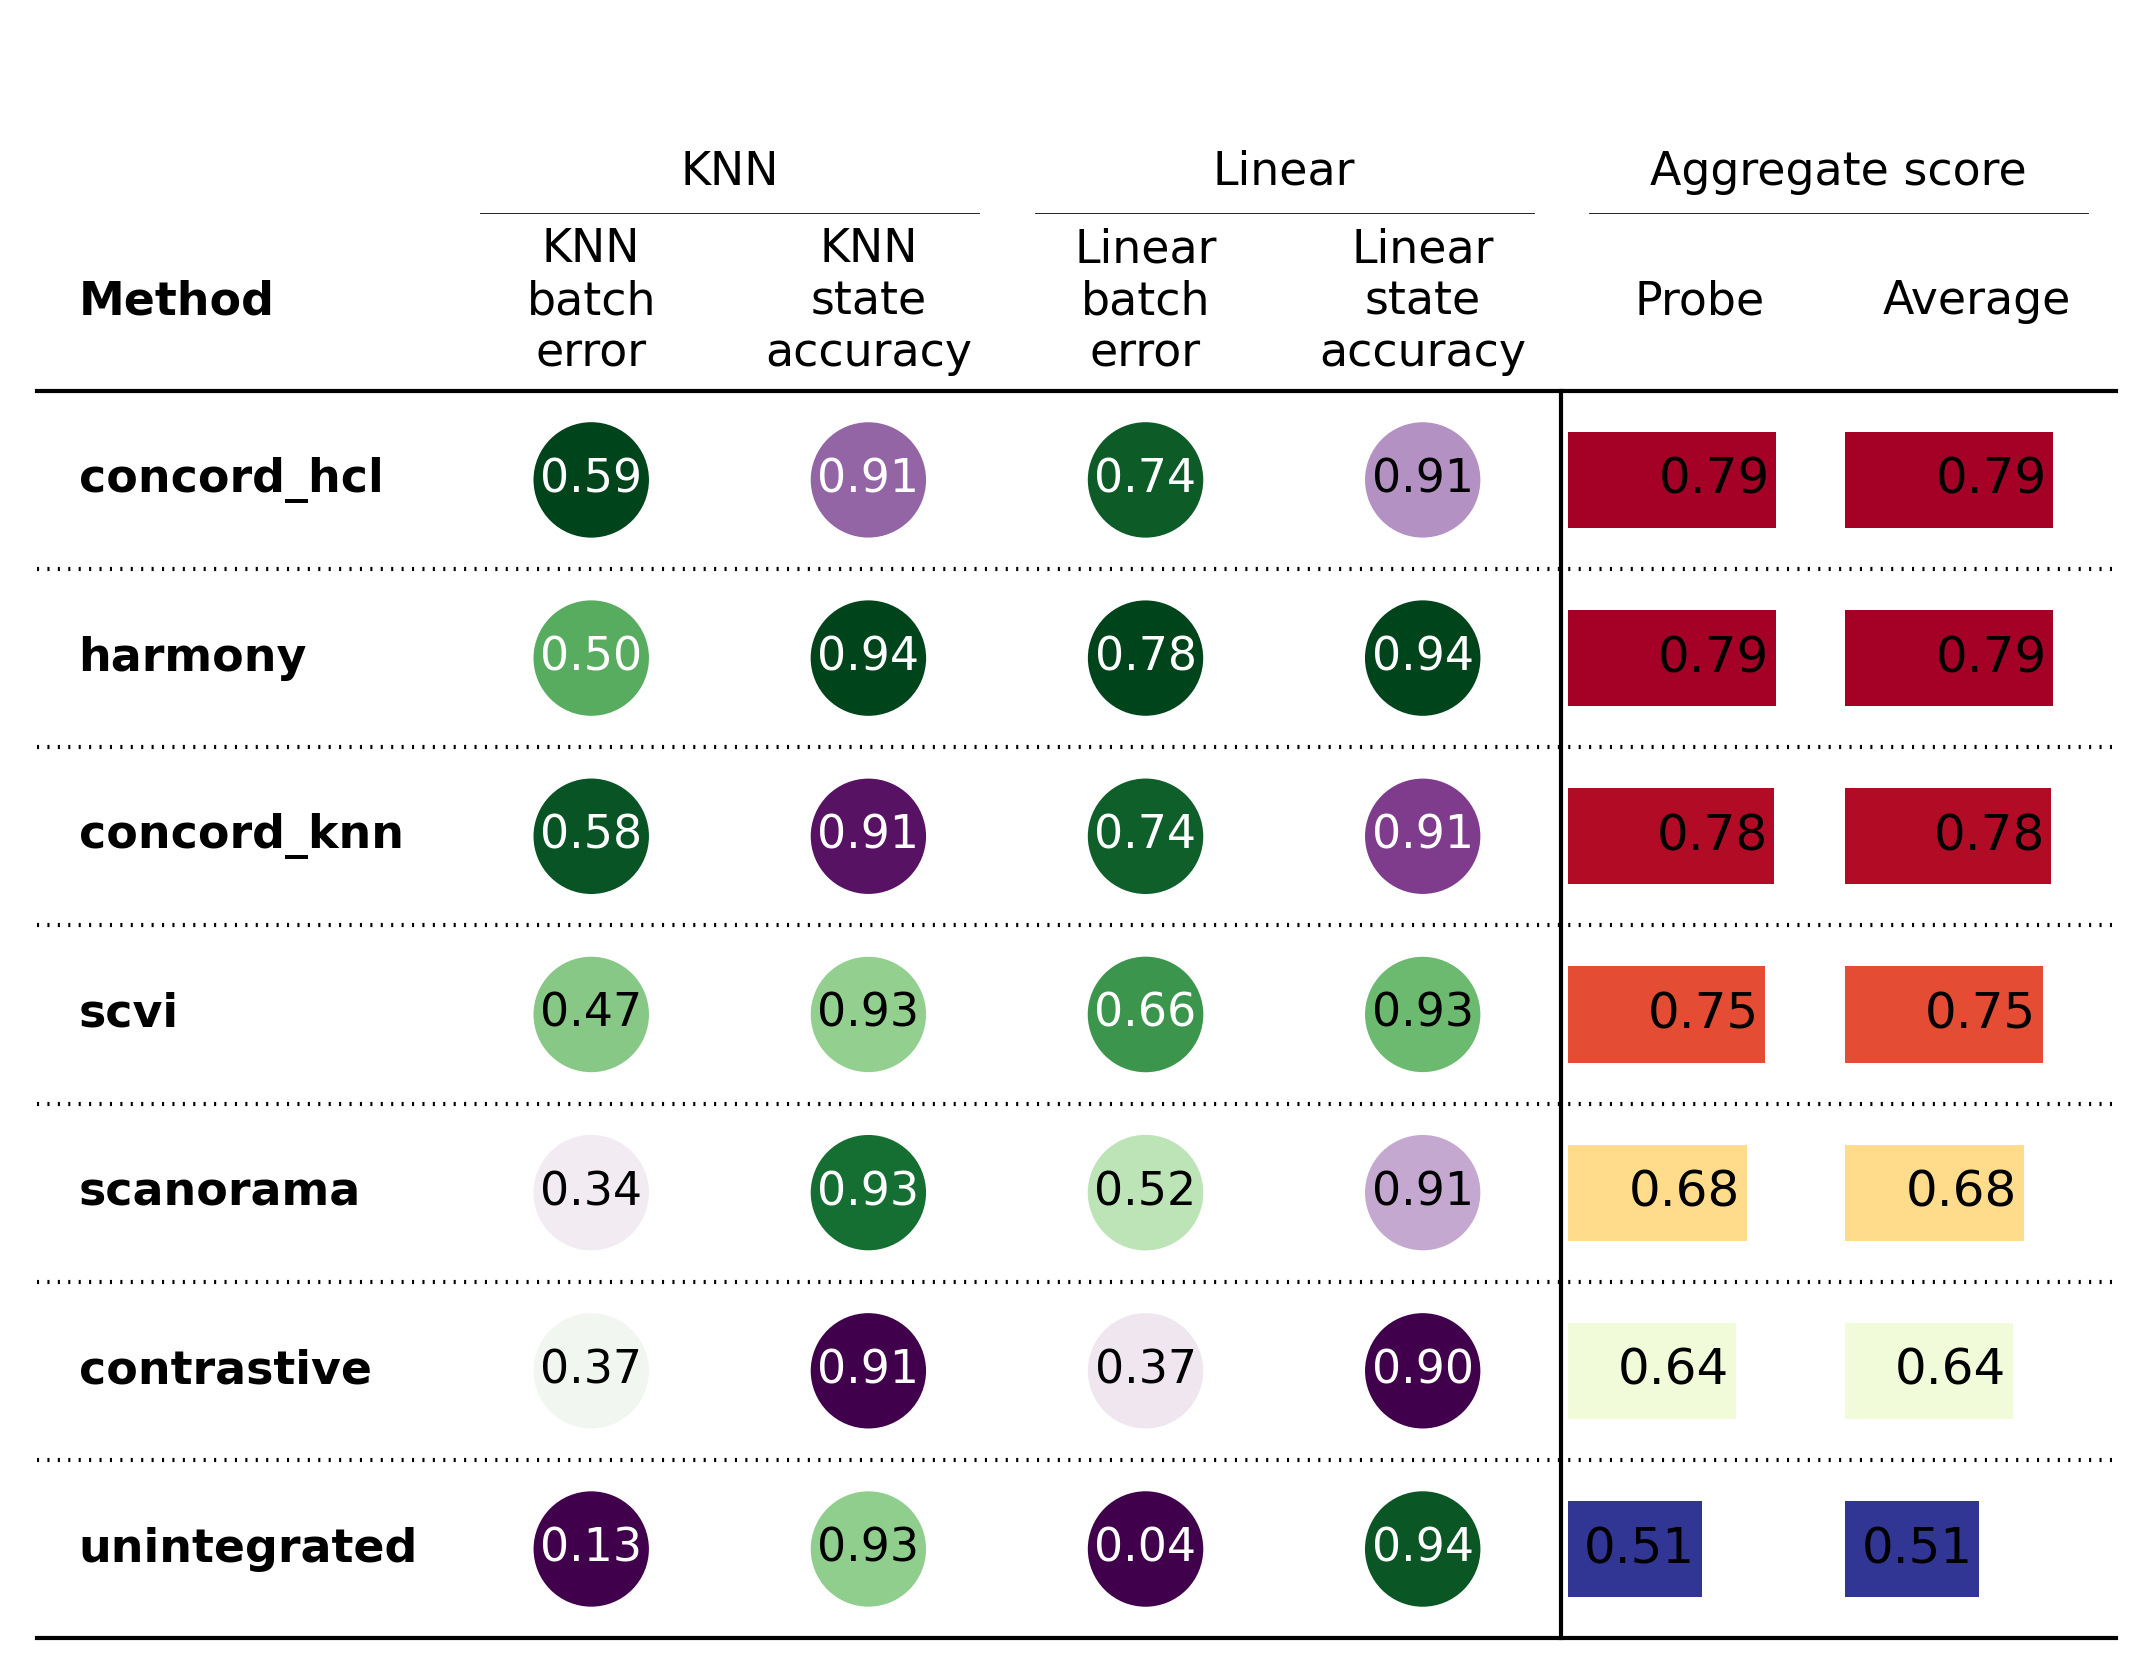

✅ Benchmark results saved to: ../save/dkd_Wilson/benchmark_author_cell_type_Jun29-2215.pkl


In [12]:
state_key = 'author_cell_type'
batch_key = 'donor_id'
out = ccd.bm.run_benchmark_pipeline(
    adata,
    embedding_keys=py_methods,
    state_key=state_key,
    batch_key=batch_key,
    save_dir=save_dir / "benchmarks_celltype",
    file_suffix=file_suffix,  # e.g. "2025-06-25"
    run=("probe"),          # run only these blocks
    plot_individual=False,          # skip the intermediate PDFs
)
combined_celltype = out["combined"]

# Save the benchmark results
import pickle
with open(save_dir / f"benchmark_{state_key}_{file_suffix}.pkl", "wb") as f:
    pickle.dump(out, f)

print(f"✅ Benchmark results saved to: {save_dir / f'benchmark_{state_key}_{file_suffix}.pkl'}")

In [8]:
out['probe']

KNN                          Linear                  \
             batch\naccuracy state\naccuracy batch\naccuracy state\naccuracy   
Method                                                                         
unintegrated        0.872384        0.927642        0.963114        0.940140   
contrastive         0.631955        0.905181        0.629228        0.901851   
scanorama           0.655309        0.933512        0.479004        0.913976   
scvi                0.528841        0.927514        0.338354        0.932610   
harmony             0.500255        0.936064        0.223740        0.941544   
concord_knn         0.423430        0.906585        0.263816        0.906956   
concord_hcl         0.407989        0.910924        0.258583        0.912317   

                 Probe  
                 Score  
Method                  
unintegrated  0.925820  
contrastive   0.767054  
scanorama     0.745450  
scvi          0.681830  
harmony       0.650401  
concord_knn   0.625197  
concord_hcl   0.622453